In [1]:
#@title
!pip install pymc

     |████████████████████████████████| 358kB 2.9MB/s 
  Created wheel for pymc: filename=pymc-2.3.6-cp36-cp36m-linux_x86_64.whl size=1272749 sha256=a0de7c8f5b985230df718d4010b5b056cff23c1176fde2e5387310b11e856473
  Stored in directory: /root/.cache/pip/wheels/e4/6d/cf/3c408a39cf0f43e3b8abcace9758575f29c6aa860e17e9222d
Successfully built pymc


In [2]:
#@title
!pip install stemming

  Created wheel for stemming: filename=stemming-1.0.1-cp36-none-any.whl size=11138 sha256=7e68f864f7d724dbbf92a3cd979d131b6591f3310193baa88cfd66514cdbd13f
  Stored in directory: /root/.cache/pip/wheels/e8/05/2e/2ddeb64d4464b854b48323f9676528c17560da7d153db7b0e2
Successfully built stemming


# Get all the imports!

In [0]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from scipy.special import softmax
from sklearn.datasets import make_spd_matrix
from sklearn.metrics.pairwise import cosine_similarity
from stemming.porter2 import stem

import csv
import matplotlib.pyplot as plt
import nltk 
import numpy as np
import pymc as pm
import seaborn as sns;
import string

# Chosen topics

In [4]:
#@title 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Throughout this homework, there will be present 10 different topics. Each one of them will be represented by 5 data samples. 

Topics are the following: 
* Astronomy
* Biology 
* Chemistry
* Physics
* Philosophy
* Economy 
* Photography 
* Geography
* Computer Science 
* History 

The first 3 documents for each topic are taken from the specific Wikipedia page of each topic, while the remaining 2 documents are mostly a mix of the previous 3 articles. Since our data has such a small sample size, I wanted to increase the frequency of some specific words for each topic. Therefore, by looking into those 3 samples from Wikipedia, I've found some words that I believe best describe that topic and inserted them multiple times in the other samples as well. 
E.g. For Biology, I've added increased the frequency of words such as "biology", "cell", "gene". 


In this case, data is given already, but I've also implemented reading from a file so that the input could be customized. 

In [132]:
with open('/content/[ProbProg] Dataset - Sheet1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        line_count += 1

documents = np.zeros([line_count,1], dtype=object)
with open('/content/[ProbProg] Dataset - Sheet1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
      documents[line_count] = row
      line_count += 1

print (documents)      

[['Most early astronomy consisted of mapping the positions astronomy of the stars and planets, astronomy a science now referred to as astrometry.']
 ['Objects of interest for astronomy include planets, moons, stars, nebulae, galaxies, and comets. astronomy in his Book of Fixed Stars astronomy.']
 ['In 964, the Andromeda Galaxy, astronomy the largest galaxy in the Local Group, was described by the astronomy Persian Muslim astronomer Abd al-Rahman al-Sufi in his Book of Fixed Stars astronomy.']
 ['astronomy stars planets astrometry planets moon star astronomy astronomy the largest galaxy in the Local Group, now referred to as astrometry.']
 ['galaxy astronomer fixed star astronomy astronomy in his Book of Fixed Stars astronomy. largest galaxy in the consisted of mapping the positions astronomy of the stars and planets, astronomy a science']
 ['Biology recognizes the cell as the basic unit of life, genes as the basic unit of heredity, and evolution as the engine that propels the creation 

In [5]:
documents = np.zeros([50,1], dtype=object)
# Astronomy 
documents[0] = "Most early astronomy consisted of mapping the positions astronomy of the stars and planets, astronomy a science now referred to as astrometry."
documents[1] = "Objects of interest for astronomy include planets, moons, stars, nebulae, galaxies, and comets. astronomy in his Book of Fixed Stars astronomy."
documents[2] = "In 964, the Andromeda Galaxy, astronomy the largest galaxy in the Local Group, was described by the astronomy Persian Muslim astronomer Abd al-Rahman al-Sufi in his Book of Fixed Stars astronomy."
documents[3] = "astronomy stars planets astrometry planets moon star astronomy astronomy the largest galaxy in the Local Group, now referred to as astrometry."
documents[4] = "galaxy astronomer fixed star astronomy astronomy in his Book of Fixed Stars astronomy. largest galaxy in the consisted of mapping the positions astronomy of the stars and planets, astronomy a science"
# Biology
documents[5] = "Biology recognizes the cell as the basic unit of life, genes as the basic unit of heredity, and evolution as the engine that propels the creation and extinction of species. mitochondria, chloroplasts, or other locations is collectively known as a cell genome biology."
documents[6] = "The set Biology of chromosomes in a cell and any other hereditary information found in the mitochondria, chloroplasts, or other locations is collectively known as a cell genome biology. basic unit of heredity,"
documents[7] = "Genes encode the Biology information needed by cells for the synthesis of proteins, which in turn play a central role in influencing the final phenotype of the organism biology. Biology recognizes the cell as the basic unit of life, genes as the basic unit of heredity,"
documents[8] = "biology genes life evolution Biology engine species specie proteins. Biology recognizes the cell as the basic unit of life, genes as the basic unit of heredity,"
documents[9] = "biology mitochondria chloroplats Biology genome cell organism. biology genes life evolution Biology engine species specie proteins."
# Chemistry 
documents[10] = "Chemistry addresses topics such as how atoms and molecules interact via chemical bonds to form new chemical compounds."
documents[11] = "Chemistry is the scientific discipline involved with elements and compounds composed of atoms, chemistry molecules and ions: their composition, structure, properties, behavior and the changes they undergo during a reaction with other substances."
documents[12] = "In a covalent bond, chemistry, one or more pairs of valence electrons are shared by two atoms: the resulting electrically neutral group of bonded atoms is termed a molecule."
documents[13] = "Chemistry addresses topics such as how atoms with elements and compounds composed of atoms, molecules and chemistry ions: their composition, structure, properties."
documents[14] = "Chemistry is the scientific discipline involved with elements and compounds composed of atoms the resulting chemistry electrically neutral group of bonded atoms is termed a molecule."
# Physics 
documents[15] = "Physics is the natural science that studies matter, its motion and behavior through space and time, and that studies the related entities of energy and force."
documents[16] = "Classical physics is generally concerned with matter and energy on the normal scale of observation, while much of modern physics is concerned with the behavior of matter and energy under extreme conditions or on a very large or very small scale."
documents[17] = "Contemporary research in physics can be broadly divided into nuclear and particle physics; condensed matter physics; atomic, molecular, and optical physics; astrophysics; and applied physics."
documents[18] = "Physics is the natural science that studies matter, and energy on the normal scale of observation, while much physics; atomic, molecular, and optical."
documents[19] = "Contemporary research in physics can be broadly divided into nuclear and particle physics; while much of modern physics entities of energy and force."
# Philosophy 
documents[20] = "Philosophy is the study of general and fundamental questions about existence, knowledge, values, reason, mind, and language."
documents[21] = "Philosophers also pose more practical and concrete questions such as: Is there a best way to live? existence god philosophy question"
documents[22] = "Issues include the existence of God, philosophy the relationship between reason and faith, questions of philosophy religious epistemology, the relationship between religion and science, how to interpret religious experiences, questions about the possibility of an afterlife, the problem of religious language and the existence of souls and responses to religious pluralism and diversity."
documents[23] = "Issues philosophy include the existence of God, the relationship between reason and faith knowledge, values, reason, mind, and language philosophy."
documents[24] = "such as: Is there a best way to live? Philosophy is the study of general questions existence. philosophy"
# Economy 
documents[25] = "Today the range of fields of study examining the economy revolves around the social science of economics, but may include sociology (economic sociology), history (economic history), anthropology (economic anthropology), and geography (economic geography)."
documents[26] = "An economy is an area of the production, distribution and trade, as well as consumption of goods and services by different agents."
documents[27] = "A market-based economy is one where goods and services are produced and exchanged according to demand and supply between participants (economic agents) by barter or a medium of exchange with a credit or debit value accepted within the network, such as a unit of currency."
documents[28] = "An economy is an area of the production, distribution and trade, and exchanged according to demand and supply between participants (economic agents)."
documents[29] = "trade, as well as consumption of goods and services by different agents (economic sociology), history (economic history), anthropology (economic anthropology), and geography (economic geography)."
# Photography 
documents[30] = "Photography is the art, application and practice of creating durable images by recording light or other electromagnetic radiation, either Photography electronically by means of an image sensor, or chemically by means of a light-sensitive material such as photographic film." 
documents[31] = "Photography Photographers control the camera and lens to expose the light recording material to the required amount Photography of light to form a latent image (on plate or film) or RAW file (in digital cameras) which, after appropriate processing, is converted to a usable image."
documents[32] = "Photographs, Photography both monochrome and color, can be captured and displayed through two side-by-side images that emulate human stereoscopic vision."
documents[33] = "Photographers control the Photography camera and lens to expose the light recording material side-by-side images that emulate human stereoscopic vision."
documents[34] = "electromagnetic radiation, either Photography electronically by means of an image sensor, or chemically by means of a light-sensitive Photography material such as photographic film."
# Geography 
documents[35] = "Geography is a field of science devoted to the study of the lands, features, inhabitants, and phenomena of the Earth and planets."
documents[36] = "The latter examines the natural environment, geography and how organisms, climate, soil, water, and landforms produce and interact." 
documents[37] = "Physical geography (or physiography) focuses on geography as an Earth science."
documents[38] = "natural environment, and how organisms, climate, soil, water, and landforms produce and interact geography as an Earth science."
documents[39] = "features, inhabitants, and phenomena of the Earth and geography planets The latter examines the natural environment, and how organisms."
# Computer Science 
documents[40] = "Computer science (sometimes called computation science or computing science, but not to be confused with computational science or software engineering) is the study of processes that interact with data and that can be represented as data in the form of programs."
documents[41] = "Programming language theory considers approaches to the description of computational processes, while computer programming itself involves the use of programming languages and complex systems."
documents[42] = "Computer science focuses on methods involved in design, specification, programming, verification, implementation and testing of human-made computing systems."
documents[43] = "Computer science (sometimes called computation science or computing science, programming, verification, implementation and testing of human-made computing systems."
documents[44] = "Computer science focuses on methods involved in design, computational processes, while computer programming itself involves the use of programming languages and complex systems."
# History 
documents[45] = "History is an umbrella term that relates to past events as well as the memory, discovery, collection, organization, presentation, and History interpretation of information about these events. Scholars who write about history are called historians."
documents[46] = "History also includes the academic discipline which uses a narrative to examine and analyse a sequence of past events, History and objectively determine the patterns of cause and effect that determine them."
documents[47] = "The modern study of history is wide-ranging, and includes the study of specific regions and the study of certain topical or thematical elements of historical investigation. Often history is taught as part of primary and secondary education, and the academic study of history is a major discipline in university studies."
documents[48] = "history is wide-ranging, and includes the study of specific regions  to examine and analyse a sequence of past events, and objectively determine the patterns of History cause and effect that determine them."
documents[49] = "interpretation of information about these events. Scholars who write about history are called historians. History study of specific regions and"

print (documents)

[['Most early astronomy consisted of mapping the positions astronomy of the stars and planets, astronomy a science now referred to as astrometry.']
 ['Objects of interest for astronomy include planets, moons, stars, nebulae, galaxies, and comets. astronomy in his Book of Fixed Stars astronomy.']
 ['In 964, the Andromeda Galaxy, astronomy the largest galaxy in the Local Group, was described by the astronomy Persian Muslim astronomer Abd al-Rahman al-Sufi in his Book of Fixed Stars astronomy.']
 ['astronomy stars planets astrometry planets moon star astronomy astronomy the largest galaxy in the Local Group, now referred to as astrometry.']
 ['galaxy astronomer fixed star astronomy astronomy in his Book of Fixed Stars astronomy. largest galaxy in the consisted of mapping the positions astronomy of the stars and planets, astronomy a science']
 ['Biology recognizes the cell as the basic unit of life, genes as the basic unit of heredity, and evolution as the engine that propels the creation 

# Data processing 

In order to use the previously added data, I've done some data processing, which includes: 
* Remove all the punctuation such as ".,!" and replacing them with spaces 
* Apply stemming to the documents, so that for each word will be reduced to its semantic root 
* Redo each document after stemming, by joining words separated by space and trim each document's spaces from both the end and the beginning 
* Remove all the stop words since they have a high frequency and are spread all over the documents, without providing any useful information 
* Filter out all the words that appear only once in throughout all documents  

## Removing punctuation 

In [6]:
for index in range(len(documents)):
  translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  print (documents[index])
  documents[index] = str(documents[index]).translate(translator) 

['Most early astronomy consisted of mapping the positions astronomy of the stars and planets, astronomy a science now referred to as astrometry.']
['Objects of interest for astronomy include planets, moons, stars, nebulae, galaxies, and comets. astronomy in his Book of Fixed Stars astronomy.']
['In 964, the Andromeda Galaxy, astronomy the largest galaxy in the Local Group, was described by the astronomy Persian Muslim astronomer Abd al-Rahman al-Sufi in his Book of Fixed Stars astronomy.']
['astronomy stars planets astrometry planets moon star astronomy astronomy the largest galaxy in the Local Group, now referred to as astrometry.']
['galaxy astronomer fixed star astronomy astronomy in his Book of Fixed Stars astronomy. largest galaxy in the consisted of mapping the positions astronomy of the stars and planets, astronomy a science']
['Biology recognizes the cell as the basic unit of life, genes as the basic unit of heredity, and evolution as the engine that propels the creation and ex

## Stemming and rebuilding documents 

In [0]:
documents = [[stem(word.lower()) for word in document[0].split(" ")] for document in documents]

In [0]:
documents = [' '.join(document) for document in documents]
documents = [document.replace('\n',' ') for document in documents]
documents = [document.strip() for document in documents]

In [9]:
print ("Documents after stemming and punctuation removal.")
print (documents)

Documents after stemming and punctuation removal.
['most earli astronomi consist of map the posit astronomi of the star and planet  astronomi a scienc now refer to as astrometri', 'object of interest for astronomi includ planet  moon  star  nebula  galaxi  and comet  astronomi in his book of fix star astronomi', 'in 964  the andromeda galaxi  astronomi the largest galaxi in the local group  was describ by the astronomi persian muslim astronom abd al rahman al sufi in his book of fix star astronomi', 'astronomi star planet astrometri planet moon star astronomi astronomi the largest galaxi in the local group  now refer to as astrometri', 'galaxi astronom fix star astronomi astronomi in his book of fix star astronomi  largest galaxi in the consist of map the posit astronomi of the star and planet  astronomi a scienc', 'biolog recogn the cell as the basic unit of life  gene as the basic unit of hered  and evolut as the engin that propel the creation and extinct of speci  mitochondria  chlo

## Removing stopwords

In [0]:
stop_words = set(stopwords.words('english')) 
filtered_documents = []
for document in documents:
  filtered_document = []
  for word in document.split(" "):
    if not word in stop_words:
      filtered_document.append(word)
  filtered_documents.append(' '.join(filtered_document))      

In [11]:
print ("Documents after filtering all the stop words.")
print (filtered_documents)

Documents after filtering all the stop words.
['earli astronomi consist map posit astronomi star planet  astronomi scienc refer astrometri', 'object interest astronomi includ planet  moon  star  nebula  galaxi  comet  astronomi book fix star astronomi', '964  andromeda galaxi  astronomi largest galaxi local group  describ astronomi persian muslim astronom abd al rahman al sufi book fix star astronomi', 'astronomi star planet astrometri planet moon star astronomi astronomi largest galaxi local group  refer astrometri', 'galaxi astronom fix star astronomi astronomi book fix star astronomi  largest galaxi consist map posit astronomi star planet  astronomi scienc', 'biolog recogn cell basic unit life  gene basic unit hered  evolut engin propel creation extinct speci  mitochondria  chloroplast  locat collect known cell genom biolog', 'set biolog chromosom cell ani hereditari inform found mitochondria  chloroplast  locat collect known cell genom biolog  basic unit hered', 'gene encod biolog 

## Building documents' dictionary 

In [12]:
dictionary = {}
counter = 0
for document in filtered_documents: 
  splitted_document = document.split(' ')
  for word in splitted_document: 
    if (word not in dictionary.keys() and (not word.isspace()) and word):
      dictionary[word] = counter
      counter += 1

print ("Words present in documents after data preprocessing: ")      
print (dictionary)      

Words present in documents after data preprocessing: 
{'earli': 0, 'astronomi': 1, 'consist': 2, 'map': 3, 'posit': 4, 'star': 5, 'planet': 6, 'scienc': 7, 'refer': 8, 'astrometri': 9, 'object': 10, 'interest': 11, 'includ': 12, 'moon': 13, 'nebula': 14, 'galaxi': 15, 'comet': 16, 'book': 17, 'fix': 18, '964': 19, 'andromeda': 20, 'largest': 21, 'local': 22, 'group': 23, 'describ': 24, 'persian': 25, 'muslim': 26, 'astronom': 27, 'abd': 28, 'al': 29, 'rahman': 30, 'sufi': 31, 'biolog': 32, 'recogn': 33, 'cell': 34, 'basic': 35, 'unit': 36, 'life': 37, 'gene': 38, 'hered': 39, 'evolut': 40, 'engin': 41, 'propel': 42, 'creation': 43, 'extinct': 44, 'speci': 45, 'mitochondria': 46, 'chloroplast': 47, 'locat': 48, 'collect': 49, 'known': 50, 'genom': 51, 'set': 52, 'chromosom': 53, 'ani': 54, 'hereditari': 55, 'inform': 56, 'found': 57, 'encod': 58, 'need': 59, 'synthesi': 60, 'protein': 61, 'turn': 62, 'play': 63, 'central': 64, 'role': 65, 'influenc': 66, 'final': 67, 'phenotyp': 68, 'or

After building a dictionary with all words encountered in documents, each word will be replaced by its corresponding dictionary value. 

In [0]:
documents = [] 
for document in filtered_documents:
  document_data = []
  splitted_document = document.split(' ')
  for word in splitted_document:
    if ((not word.isspace()) and word):
      document_data.append(dictionary[word])
  documents.append(document_data)    

## Removing words which appear less than 2 times 

Compute words frequencies for all the documents put together.  

In [14]:
full_corpus = [] 
for index in range(len(documents)):
  full_corpus = full_corpus + documents[index]  

print (full_corpus)  
words, frequencies = np.unique(full_corpus, return_counts=True)

[0, 1, 2, 3, 4, 1, 5, 6, 1, 7, 8, 9, 10, 11, 1, 12, 6, 13, 5, 14, 15, 16, 1, 17, 18, 5, 1, 19, 20, 15, 1, 21, 15, 22, 23, 24, 1, 25, 26, 27, 28, 29, 30, 29, 31, 17, 18, 5, 1, 1, 5, 6, 9, 6, 13, 5, 1, 1, 21, 15, 22, 23, 8, 9, 15, 27, 18, 5, 1, 1, 17, 18, 5, 1, 21, 15, 2, 3, 4, 1, 5, 6, 1, 7, 32, 33, 34, 35, 36, 37, 38, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 34, 51, 32, 52, 32, 53, 34, 54, 55, 56, 57, 46, 47, 48, 49, 50, 34, 51, 32, 35, 36, 39, 38, 58, 32, 56, 59, 34, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 32, 32, 33, 34, 35, 36, 37, 38, 35, 36, 39, 32, 38, 37, 40, 32, 41, 45, 45, 61, 32, 33, 34, 35, 36, 37, 38, 35, 36, 39, 32, 46, 70, 32, 51, 34, 69, 32, 38, 37, 40, 32, 41, 45, 45, 61, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 78, 82, 71, 83, 84, 85, 86, 82, 87, 74, 71, 75, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 79, 71, 99, 100, 101, 102, 103, 104, 74, 105, 106, 107, 23, 79, 74, 108, 75, 71, 72, 73, 74, 86, 82, 87, 74, 75, 71, 88, 89, 90, 91, 71, 83, 84, 85, 86,

Remove words that have frequency less than 2. 

In [15]:
final_documents = []
for index_1 in range(len(documents)):
  document = [] 
  for index_2 in range(len(documents[index_1])):
    if frequencies[documents[index_1][index_2]] >= 2: 
      document.append(documents[index_1][index_2])
  final_documents.append(document)    

print (final_documents)      


[[1, 2, 3, 4, 1, 5, 6, 1, 7, 8, 9], [10, 1, 12, 6, 13, 5, 15, 1, 17, 18, 5, 1], [15, 1, 21, 15, 22, 23, 1, 27, 29, 29, 17, 18, 5, 1], [1, 5, 6, 9, 6, 13, 5, 1, 1, 21, 15, 22, 23, 8, 9], [15, 27, 18, 5, 1, 1, 17, 18, 5, 1, 21, 15, 2, 3, 4, 1, 5, 6, 1, 7], [32, 33, 34, 35, 36, 37, 38, 35, 36, 39, 40, 41, 45, 46, 47, 48, 49, 50, 34, 51, 32], [32, 34, 56, 46, 47, 48, 49, 50, 34, 51, 32, 35, 36, 39], [38, 32, 56, 34, 61, 69, 32, 32, 33, 34, 35, 36, 37, 38, 35, 36, 39], [32, 38, 37, 40, 32, 41, 45, 45, 61, 32, 33, 34, 35, 36, 37, 38, 35, 36, 39], [32, 46, 32, 51, 34, 69, 32, 38, 37, 40, 32, 41, 45, 45, 61], [71, 72, 73, 74, 75, 76, 78, 79, 80, 78, 82], [71, 83, 84, 85, 86, 82, 87, 74, 71, 75, 88, 89, 90, 91, 92], [79, 71, 99, 102, 104, 74, 105, 106, 107, 23, 79, 74, 108, 75], [71, 72, 73, 74, 86, 82, 87, 74, 75, 71, 88, 89, 90, 91], [71, 83, 84, 85, 86, 82, 87, 74, 105, 71, 106, 107, 23, 79, 74, 108, 75], [109, 110, 7, 111, 112, 92, 111, 116, 117, 118, 119], [109, 121, 122, 112, 118, 123, 12

# Plots for words frequencies 

After finishing up with all data processing, we plot for each topic word frequencies, having on the OX axis the corresponding index (according to the word dictionary) and on the OY axis word frequency. 

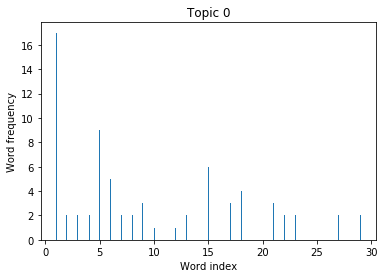

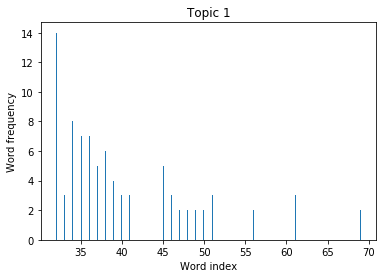

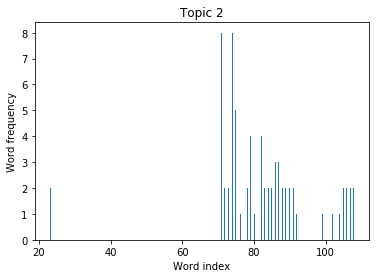

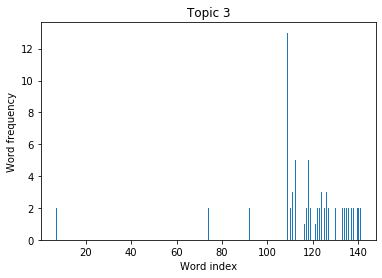

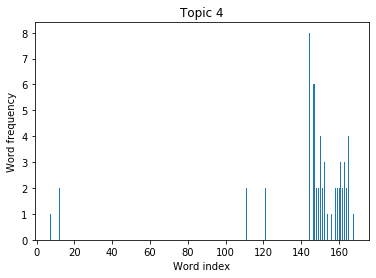

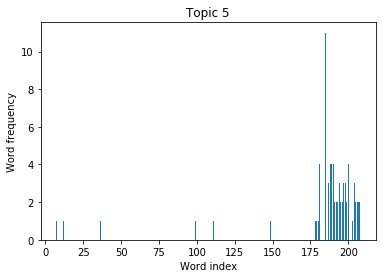

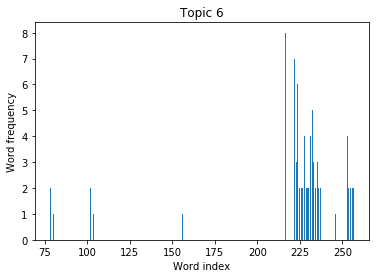

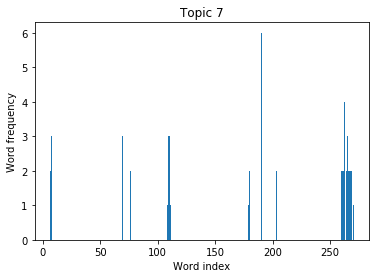

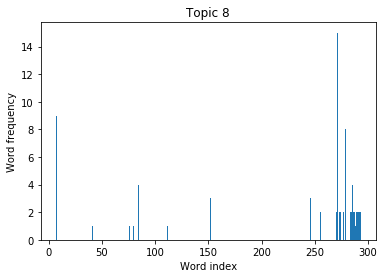

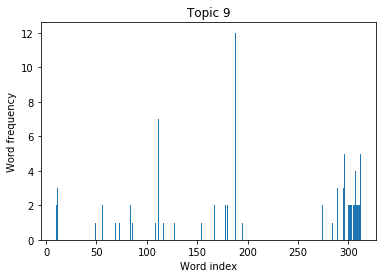

In [16]:
for topic in range(10):
  all_documents = final_documents[topic * 5] + final_documents[topic * 5 + 1] + final_documents[topic * 5 + 2] + final_documents[topic * 5 + 3] + final_documents[topic * 5 + 4]
  values = np.unique(all_documents)
  frequencies = np.bincount(all_documents)
  min_index = values[0]
  max_index = values[-1] + 1
  plt.figure(topic)
  plt.title('Topic %d' % (topic))
  plt.xlabel('Word index')
  plt.ylabel('Word frequency')
  plt.hist(all_documents, bins=300)
  plt.show()


# LDA 

The actual part of solving Latent Dirichlet allocation. 
For the next part, variables have the following meanings: 
* K - number of topics (in this case 10) 
* M - number of words in our dictionary 
* N - number of documents present in the dataset 
* phi - distribution of words over each topic
* theta - words distribution for each topic 
* z - an array for each document with topic assignments for each word (in this case between 0 and 9) 



For finding the best alpha and beta parameters, I've run an exhaustive search over [0.2, 0.3, ..., 0.9] x [0.2, 0.3, ..., 0.9]. After the first trial, I've noticed that better results happen when beta and alpha have values equal (or almost equal) to one another. 

Thus, I've run another exhaustive search for finding the best value between 0.1 and 1 for alpha and beta (see exhaustive_search method). 

After sampling, I've taken the last trace for each topic and printed the top 10 words (by probability) for each topic (using sort_keys method).  

In [0]:
def sort_keys(val):
  return val[0]

In [0]:
def exhaustive_search(minus): 
  K = 10 
  M = len(dictionary) 
  N = len(final_documents) 

  alpha = np.ones(K) - minus
  beta = np.ones(M) - minus

  theta = pm.Container([pm.CompletedDirichlet("theta_%s" % i, pm.Dirichlet("ptheta_%s" % i, theta=alpha)) for i in range(N)])
  phi = pm.Container([pm.CompletedDirichlet("phi_%s" % k, pm.Dirichlet("pphi_%s" % k, theta=beta)) for k in range(K)])
  documents_length = [len(document) for document in final_documents]

  z = pm.Container([pm.Categorical('z_%i' % d, p = theta[d], size=documents_length[d], 
                                   value=np.random.randint(K, size=documents_length[d])) for d in range(N)])

  w = pm.Container([pm.Categorical("w_%i_%i" % (d,i), p = pm.Lambda('phi_z_%i_%i' % (d,i), lambda z=z[d][i], phi=phi: phi[z]),
                                   value=final_documents[d][i], observed=True) for d in range(N) for i in range(documents_length[d])])

  model = pm.Model([theta, phi, z, w])
  mcmc = pm.MCMC(model)
  mcmc.sample(3000, 1000)

  print ("For alpha = %s beta = %s" %(1 - minus, 1 - minus))
  for k in range(K):
    v = (mcmc.trace('phi_%s'%k)[1999])
    zipped = list(zip(v[0], (list(dictionary.keys()))))
    zipped.sort(key=sort_keys, reverse=True)
    print ("Topic %i" %k, zipped[:10])

From this exhaustive search, it can be observed that alpha = 0.7 and beta = 0.7 seemed to be the most appropriate values for clustering together words from the same topic. 

For example, with those values, topic 1 has in its top 10 words (by probability) the following: "forc", "physic", "system", "condens" (all of them meant to be part of the Physics topic at the beginning).  
Furthermore, topic 8 gathers together words such as "univers", "astronom", "astromeri" in its top 10, and all of the other topics seem to have quite more sense than the other experiments for different alpha/beta values. 

Since this dataset has a limited number of documents (30), each one of them with a modest number of words and 10 possible topics, I believe that even managing to cluster together a couple of words from the same topic is a great result.  

In [28]:
minus = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for i in range(len(minus)):
    exhaustive_search(minus[i])

 [-----------------100%-----------------] 3000 of 3000 complete in 137.5 secFor alpha = 1 beta = 1
Topic 0 [(0.02338559621700934, 'ani'), (0.021884562408408945, 'optic'), (0.020015093578468354, 'determin'), (0.019834441310813047, 'digit'), (0.019300515722513695, 'unit'), (0.01778032372368935, 'scienc'), (0.016792833989428827, 'local'), (0.015697274246834116, 'posit'), (0.014279734593507324, 'book'), (0.013980916110585767, 'languag')]
Topic 1 [(0.024215611187753203, 'part'), (0.02119571362900593, 'veri'), (0.01763776577312541, 'scientif'), (0.01738472855675022, 'stereoscop'), (0.017110629176471635, 'rahman'), (0.015026779101719212, 'particip'), (0.014902093475462294, 'languag'), (0.014160510050011175, 'studi'), (0.013861085248798675, 'practic'), (0.01337127364488359, 'speci')]
Topic 2 [(0.04288526285788238, 'concret'), (0.027586424858071786, 'captur'), (0.02074456095534177, 'chemic'), (0.018196341716028446, 'econom'), (0.01801913870479484, 'includ'), (0.017781960882271765, 'earli'), (0.

We've decided to move forward to a 10000 sampling with alpha = beta = 0.7. 

In [148]:
K = 10 
M = len(dictionary) 
N = len(final_documents) 
alpha = np.ones(K) - 0.3
beta = np.ones(M) - 0.3

theta = pm.Container([pm.CompletedDirichlet("theta_%s" % i, pm.Dirichlet("ptheta_%s" % i, theta=alpha)) for i in range(N)])
phi = pm.Container([pm.CompletedDirichlet("phi_%s" % k, pm.Dirichlet("pphi_%s" % k, theta=beta)) for k in range(K)])
documents_length = [len(document) for document in final_documents]

z = pm.Container([pm.Categorical('z_%i' % d, p = theta[d], size=documents_length[d],
                    value=np.random.randint(K, size=documents_length[d])) for d in range(N)])

w = pm.Container([pm.Categorical("w_%i_%i" % (d,i), p = pm.Lambda('phi_z_%i_%i' % (d,i), lambda z=z[d][i], phi=phi: phi[z]),
                    value=final_documents[d][i], observed=True) for d in range(N) for i in range(documents_length[d])])

model = pm.Model([theta, phi, z, w])
mcmc = pm.MCMC(model)
mcmc.sample(10000, 1000)

 [-----------------100%-----------------] 10000 of 10000 complete in 902.7 sec

In [149]:
for i in range(K):
  print (mcmc.trace("phi_%s" %i)[8999])

[[5.64531099e-06 1.98906465e-03 1.48512607e-04 2.43127478e-04
  2.47362970e-03 3.68761225e-03 4.29304541e-03 1.33259164e-04
  4.36700336e-05 6.28222056e-04 1.75180275e-04 1.27892102e-03
  4.13379227e-04 8.04423026e-04 4.22219701e-03 2.20584639e-03
  2.83872848e-03 7.49449987e-03 8.32988028e-05 8.70597499e-03
  1.68942542e-03 1.18690906e-02 5.17897743e-03 6.58522135e-04
  4.70235667e-04 2.40646881e-04 4.56776780e-03 4.40762963e-06
  2.90386803e-03 1.50589626e-03 1.86971262e-06 2.99008840e-03
  7.32224478e-03 8.52671709e-04 3.40982422e-04 8.27151373e-07
  1.89228127e-03 9.16526750e-03 7.88433312e-04 8.29583353e-04
  6.74454081e-03 9.49877662e-06 3.13369961e-03 5.00748958e-04
  8.44135281e-06 1.13125912e-02 1.01675552e-03 5.61566030e-03
  7.74760299e-04 2.39022914e-03 1.57400750e-03 8.66649242e-06
  6.00450255e-04 1.89405261e-04 4.35367948e-03 1.33060585e-03
  1.84479467e-03 1.61219831e-03 2.27326603e-03 5.90301519e-04
  5.30397219e-03 4.31481772e-06 3.68540376e-05 1.06876866e-03
  3.2944

Sanity check. Each word gets assigned a topic (between 0-9) to which it is most likely to belong.  

In [20]:
for d in range(N):  
    print(mcmc.trace('z_%i'%d)[8999])  

[3 9 0 9 9 5 5 9 6 9 9]
[1 5 1 4 6 7 5 6 9 6 9 8]
[4 9 5 5 5 4 9 5 4 7 5 2 2 0]
[3 9 4 4 4 8 5 9 8 9 5 5 5 5 5]
[5 3 3 5 3 3 9 6 5 9 9 6 2 3 5 3 9 5 3 3]
[6 3 7 6 2 1 7 2 1 8 1 4 1 8 3 6 3 0 0 3 6]
[6 4 2 7 2 4 1 1 4 6 6 4 1 3]
[3 6 2 8 7 3 6 6 6 6 7 3 1 3 8 3 2]
[6 3 9 9 6 5 0 0 9 6 9 6 7 3 3 3 5 5 6]
[1 8 4 0 4 4 4 4 9 4 4 4 0 1 1]
[3 2 7 2 6 7 6 5 9 9 9]
[4 8 3 5 9 5 5 2 4 5 2 0 7 7 3]
[5 7 7 7 5 4 9 9 5 3 1 6 4 3]
[4 2 1 8 7 1 2 7 1 8 5 0 2 7]
[9 3 4 4 7 1 1 1 2 4 4 7 1 1 7 1 1]
[5 3 6 3 7 8 3 9 7 3 5]
[5 1 6 6 8 6 6 4 6 6 4 1 6 4 4 5 1 6]
[5 7 5 5 3 5 3 5 7 5 5 9 9 5 7]
[5 4 6 9 4 4 4 8 4 4 5 7 6 1]
[5 4 5 0 5 5 5 4 4 4 5 0 4 5]
[5 9 3 9 0 8 0 0 0 1]
[4 3 8 9 4 7 3 6 4 4]
[3 5 3 4 5 5 7 1 9 5 5 3 5 1 5 5 5 9 0 5]
[1 0 1 3 3 5 0 7 0 8 0 7 8 8]
[3 3 4 8 3 4 3 3 4]
[6 2 3 3 3 6 2 2 5 2 6 3 4 1 9 4 5 9 2 3]
[1 1 3 5 1 0 5 7 3 3 3]
[1 3 3 3 3 3 3 0 6 7 3 3 3 3 3]
[4 4 4 8 7 4 4 3 8 7 3 4]
[9 4 4 2 3 4 9 4 6 4 4 3 5 6 4 6 3 6]
[9 3 1 1 6 6 9 3 5 6 3 3 3 9 1 1 6 9 8 1]
[9 3 3 5 9 0 9 1 1

In [21]:
for j in range(K):
  v = (mcmc.trace('phi_%s'%j)[8999])
  zipped = list(zip(v[0], (list(dictionary.keys()))))
  zipped.sort(key=sort_keys, reverse=True)
  print ("Topic %i" %j, zipped[:10])

Topic 0 [(0.026468806147606928, 'stereoscop'), (0.025922327157003534, 'part'), (0.02289355568021814, 'role'), (0.022869915736803362, 'experi'), (0.019743391283436513, 'concret'), (0.01739390686325679, 'comput'), (0.017341577816179385, 'astrophys'), (0.015526032821335056, 'human'), (0.015288001019529913, 'exist'), (0.015217492408131984, 'sequenc')]
Topic 1 [(0.027082351350555277, 'veri'), (0.025055104307302234, 'problem'), (0.021775360893485914, 'determin'), (0.018600589111940954, 'digit'), (0.016373147466017982, 'file'), (0.01618247706611084, 'andromeda'), (0.016134452076051877, 'map'), (0.01608212598749113, 'inhabit'), (0.015533501332780584, 'rang'), (0.014708714099444364, 'faith')]
Topic 2 [(0.032957599754059874, 'univers'), (0.0327375998965762, 'field'), (0.021358103526692068, 'system'), (0.017360445943340182, 'part'), (0.016284831751536232, 'compos'), (0.01611902569951262, 'demand'), (0.016012912566051102, 'data'), (0.015450309093979415, 'general'), (0.015257851839070361, 'particip

# Extras 

## Topics similarity 

For this task, I've chosen to compute both the dot product and cosine similarity for finding out every two topics' similarity and then compute a heatmap. 

### Dot product 

In [0]:
topic_similarity = np.zeros([10, 10], dtype='f')

for topic_1 in range(K):
  for topic_2 in range(K): 
    trace_1 = mcmc.trace('phi_%s' % topic_1)[8999]
    trace_2 = mcmc.trace('phi_%s' % topic_2)[8999]
    similarity = np.sum([a*b for a,b in zip(trace_1, trace_2)])
    topic_similarity[topic_1][topic_2] = similarity

Lighter the color, higher similarity. 
For dot product, it can be seen that each topic j, has the highest similarity with itself, but there shouldn't be any difference in value between [topic_j, topic_j] and [topic_i, topic_i] since both should have similarity 1. 

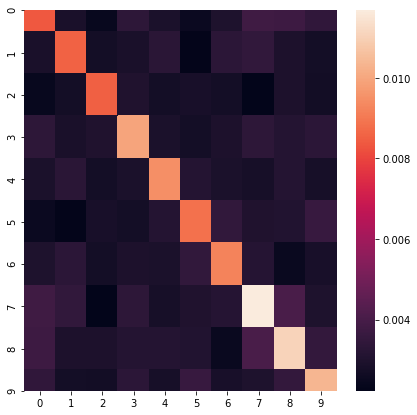

In [52]:
plt.figure(figsize=(7,7))
sns.heatmap(topic_similarity)

### Cosine similarity 

In [0]:
topic_similarity = np.zeros([10, 10], dtype='f')

for topic_1 in range(K):
  for topic_2 in range(K): 
    trace_1 = mcmc.trace('phi_%s' % topic_1)[8999]
    trace_2 = mcmc.trace('phi_%s' % topic_2)[8999]
    topic_similarity[topic_1][topic_2] = cosine_similarity(trace_1, trace_2) 

Cosine similarity takes into account each array's norm, therefore it assigns 1 (max similarity) value for every topic i with itself. 


Also, it can be noticed that all other squares are pretty dark, which signifies that there's almost no similarity between any two topics.  

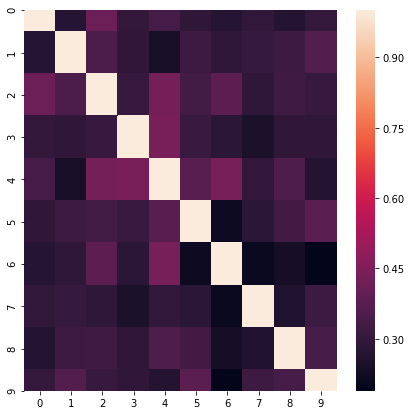

In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(topic_similarity)

## Assign a new document to a topic

For assigning a new document to a topic, it firstly has to be preprocessed exactly in the same manner as the other documents (used for learning) were. 
* Eliminate punctuation 
* Reduce all words to their semantic root  
* Exclude all words that don't appear in our dictionary 
* Replace each word with its corresponding number from the dictionary 


In [0]:
def preprocess_document(document): 
  # Make all the preprocessing steps that we've done for the other documents 
  # Eliminate punctuation, perform stemming, filter out stop words.
  translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  document = str(document).translate(translator) 
  document = [stem(word.lower()) for word in document.split(" ")] 
  document = ' '.join(document) 
  document = document.replace('\n',' ')
  document = document.strip()

  filtered_document = []
  for word in document.split(" "):
    if not word in stop_words:
      filtered_document.append(word)

  print (filtered_document)
  # Eliminate all the words that can't be found in the formerly created dictionary 
  final_document = []
  for index in range(len(filtered_document)):
    if filtered_document[index] in dictionary.keys():
      final_document.append(filtered_document[index])

  numbered_document = [] 
  for index in range(len(final_document)):
    if ((not final_document[index].isspace()) and final_document[index]):
      numbered_document.append(dictionary[final_document[index]])

  return numbered_document

After making for each string a corresponding integer array, we will compute based on each phi (the equivalent distribution over words for that topic) the sum of each word's probability.    

In [0]:
def find_best_topic(document):
  best_score = 0
  best_index = 0
  for topic in range(K):
    phi_values = mcmc.trace('phi_%s' % topic)[8999]
    score = 0
    for index in range(len(document)): 
      score += phi_values[0][document[index]]
    print ("Topic %s score: %s" %(topic, score)) 
    if (score > best_score):
      best_score = score
      best_index = topic

  print () 
  print ("The best topic for this document is topic %s with a of score %s" %(best_index, best_score))

In [0]:
def assign_topic(document):
  processed_document = preprocess_document(document)
  find_best_topic(processed_document)

### Mock documents for testing 

In [49]:
# Astronomy 
document1 = "astronomy"
assign_topic(document1) 

document11 = " astronomy of the stars and planets,"
assign_topic(document11)

document12 = "Objects of interest for astronomy include planets, moons, stars, nebulae, galaxies, and comets."
assign_topic(document12)

document13 = "largest galaxy in the consisted of mapping the positions astronomy of the stars and planets, astronomy a science"
assign_topic(document13)

document14 = "astronomy stars planets astrometry planets moon star astronomy astronomy the largest galaxy in the Local Group,"
assign_topic(document14)
# Biology
document2 = "biology"
assign_topic(document2)
# Chemistry
document3 = "chemistry"
assign_topic(document3)
# Physics
document4 = "physics"
assign_topic(document4)
# Philosophy
document5 = "philosophy"
assign_topic(document5)
# Economy
document6 = "economy"
assign_topic(document6)
# Photography
document7 = "photography"
assign_topic(document7)
# Geography
document8 = "geography"
assign_topic(document8)
# Computer Science
document9 = "computer science"
assign_topic(document9)
# History
document10 = "history"
assign_topic(document10)

['astronomi']
Topic 0 score: 0.00018866172233106198
Topic 1 score: 0.00011363477614929582
Topic 2 score: 0.002064688485607128
Topic 3 score: 0.017320992740524684
Topic 4 score: 0.0005756110163784705
Topic 5 score: 0.0008102192631321816
Topic 6 score: 0.004944732935548594
Topic 7 score: 0.00019185622379643414
Topic 8 score: 0.003882531065240996
Topic 9 score: 0.005176063317030645

The best topic for this document is topic 3 with a of score 0.017320992740524684
['astronomi', 'star', 'planet']
Topic 0 score: 0.0017643874905379346
Topic 1 score: 0.002066222769844708
Topic 2 score: 0.013820828277828542
Topic 3 score: 0.019233157332054007
Topic 4 score: 0.024494920965870217
Topic 5 score: 0.019417159036810253
Topic 6 score: 0.006399878418743466
Topic 7 score: 0.02028664591832481
Topic 8 score: 0.009899187721469815
Topic 9 score: 0.020245317662403537

The best topic for this document is topic 4 with a of score 0.024494920965870217
['object', 'interest', 'astronomi', 'includ', 'planet', '', 'm

## Correlated topic modeling 

For this task I've followed the steps from the following link:
https://projecteuclid.org/download/pdfview_1/euclid.aoas/1183143727

Parameters K, M, N stay the same, meaning that:
* K - number of topics
* M - dictionary length 
* N - number of documents 

Anyway, for this task, z - which represents each document's word assignments to topics (categorical values between 0 and 9) - depends on \eta. 
* eta_d ~ N(mu, sigma) (multivariate distribution, of mean = mu and covariance = sigma) - shape = (1, K). Thus, eta will have the following shape: (number of documents, number of topics) 
* for each eta, corresponding to a document, there is computed theta (or f(eta)) equal to the softmax array with shape = (1,K)  
* in the next steps, there are drawn topic assignments and words in a similar manner to LDA  

In [146]:
K = 10 
M = len(dictionary) 
N = len(final_documents) 

mu = np.ones([1,K])
cov = make_spd_matrix(K)

eta = pm.Container([pm.MvNormal('eta_%s'% i, mu = mu[0], tau = cov) for i in range(N)])
theta = pm.Container([softmax(eta[i].value) for i in range(N)])

documents_length = [len(document) for document in final_documents]
z = pm.Container([pm.Categorical('z_%i' % d, p=theta[d], size=documents_length[d],
                     value=np.random.randint(K, size=documents_length[d])) for d in range(N)])

w = pm.Container([pm.Categorical("w_%i_%i" % (d,i), p = pm.Lambda('phi_z_%i_%i' % (d,i), lambda z=z[d][i], phi=phi: phi[z]),
                    value=final_documents[d][i], observed=True) for d in range(N) for i in range(documents_length[d])])

model = pm.Model([theta, phi, z, w])
mcmc = pm.MCMC(model)
mcmc.sample(10000, 1000)

 [-----------------100%-----------------] 10001 of 10000 complete in 2077.3 sec

In [147]:
for i in range(K):
  print (mcmc.trace("phi_%s" %i)[8999])

[[4.87878622e-04 9.49367104e-05 7.35186536e-03 1.39624792e-04
  3.39046947e-03 1.44117572e-04 1.09447295e-03 2.01939810e-03
  2.90575368e-06 1.00863973e-03 1.62424191e-04 2.56442504e-04
  6.58482726e-05 8.86568117e-03 3.32461778e-04 3.63030409e-03
  2.21803681e-04 3.11770474e-05 2.64728264e-03 2.00204739e-03
  2.03708403e-03 1.34649913e-04 1.88044258e-02 3.75639192e-03
  1.54826433e-02 1.18454380e-03 1.85291535e-03 2.89241393e-03
  5.84941376e-05 3.83825631e-04 2.03035762e-03 1.20559257e-04
  1.21826195e-03 1.00171211e-04 1.41309327e-04 2.47996229e-05
  2.69617661e-03 3.29627464e-04 1.86111957e-03 3.34687664e-03
  3.74754112e-06 3.04397605e-04 1.57822950e-02 1.73571566e-04
  3.10717357e-05 1.59871194e-03 3.07970439e-05 4.31586524e-03
  9.59583192e-05 8.54096779e-04 3.97952344e-05 3.87729420e-03
  1.64303104e-06 8.65430927e-05 1.59418565e-05 5.54958714e-04
  1.75570033e-04 8.23683508e-05 1.55949423e-03 9.18707615e-04
  7.49972698e-03 1.22679587e-03 3.35882657e-04 3.96224165e-04
  5.9547

Sanity check. Each word gets assigned a topic (between 0-9) to which it is most likely to belong.

In [139]:
for d in range(N):  
    print(mcmc.trace('z_%i'%d)[8999])  

[1 4 4 5 3 8 2 1 8 4 5]
[6 6 6 6 7 6 6 7 6 6 6 6]
[5 5 5 9 5 5 5 5 5 9 1 5 2 5]
[3 8 7 2 7 8 8 8 7 5 7 9 3 3 2]
[5 5 5 5 5 5 9 1 0 8 5 0 5 5 0 0 5 9 5 5]
[6 6 6 0 0 5 2 5 4 4 5 5 2 2 6 6 2 3 2 5 7]
[2 2 7 2 5 6 7 2 5 7 2 8 2 7]
[0 7 9 9 7 9 9 8 9 9 0 7 7 4 7 7 7]
[7 9 2 4 3 7 2 9 7 4 7 7 4 4 7 2 7 0 7]
[5 2 5 5 5 2 6 5 0 5 6 5 4 5 9]
[2 2 2 2 3 3 2 3 3 2 2]
[2 0 3 6 3 5 5 6 6 9 0 8 5 8 8]
[9 5 1 1 5 1 8 4 5 5 8 2 5 3]
[9 6 9 2 9 2 4 2 9 9 3 5 9 7]
[1 7 1 4 1 5 4 2 0 9 9 4 4 9 7 4 9]
[2 3 2 9 3 3 3 2 3 7 3]
[4 5 1 3 1 4 4 4 8 0 4 1 8 4 1 4 4 4]
[1 9 8 9 9 8 1 5 3 2 1 3 2 2 5]
[2 7 3 9 7 9 2 3 6 9 2 8 3 2]
[1 8 8 8 4 1 8 8 8 1 8 1 8 1]
[5 3 2 7 3 2 3 7 5 3]
[0 3 5 8 0 0 3 1 3 3]
[6 8 2 9 8 8 8 7 7 8 7 8 6 3 8 7 6 7 2 8]
[0 8 4 4 8 1 1 1 4 0 4 8 2 8]
[0 8 6 8 6 9 3 8 8]
[3 1 1 1 3 3 0 9 0 1 1 9 5 9 3 9 1 7 3 5]
[3 9 5 6 9 9 7 7 0 8 7]
[9 1 1 3 7 1 1 7 8 0 0 4 9 7 3]
[1 4 1 4 3 1 3 4 2 4 4 4]
[1 1 6 8 8 1 4 4 4 4 4 4 1 4 8 8 4 4]
[4 4 4 4 4 4 9 4 4 4 8 4 4 4 9 4 4 7 0 4]
[7 7 6 8 1 7 7 8 7

Top 10 words for each topic based on their probability. 

In [140]:
for j in range(K):
  v = (mcmc.trace('phi_%s'%j)[8999])
  zipped = list(zip(v[0], (list(dictionary.keys()))))
  zipped.sort(key=sort_keys, reverse=True)
  print ("Topic %i" %j, zipped[:10])

Topic 0 [(0.02130586329789963, 'sociolog'), (0.017754246283416045, 'side'), (0.017107130185137796, 'landform'), (0.016948115364203823, 'speci'), (0.016024794075493603, 'film'), (0.01529682229287041, 'classic'), (0.015078200024681106, 'pair'), (0.01497240091574206, 'found'), (0.014251564016840221, 'servic'), (0.013546698619691952, 'astronom')]
Topic 1 [(0.021683731487362003, 'god'), (0.021352009270327522, 'energi'), (0.018270591054979548, 'examin'), (0.018065568470235417, 'studi'), (0.015652085219258278, 'mean'), (0.01465276118439772, 'form'), (0.012374842290688576, 'hered'), (0.012156852149543226, 'optic'), (0.011854212337652315, 'general'), (0.011798160903383453, 'sufi')]
Topic 2 [(0.021794491650505423, 'camera'), (0.019948363662137106, 'organ'), (0.019854925372370262, 'program'), (0.01715493364666383, 'atom'), (0.017066849481833353, 'particl'), (0.016849523727828233, 'fundament'), (0.014827552290575937, 'mitochondria'), (0.014685903109609596, 'gene'), (0.014578771961582596, 'water'),